# 1. Import necessary library

In [ ]:
!pip install xgboost
!pip install openpyxl

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import joblib



# 2.Data Preparation

In [ ]:
# Load the dataset
df = pd.read_csv("traffic_index.csv")
df_Project = pd.read_csv('Saudi_projects_dataset.csv')
df_Population = pd.read_excel('Population2.xlsx')

## a.Exploratory Data Analysis (EDA)

In [ ]:
print("Num of rows for trffic data" , df.shape[0])
print("Num of columns for trffic data" , df.shape[1])
print("name of columns for trffic data " , df.columns)

print("Num of rows for population data" , df_Population.shape[0])
print("Num of columns for population data" , df_Population.shape[1])
print("name of columns for population data " , df_Population.columns)

print("Num of rows for projects data" , df_Project.shape[0])
print("Num of columns for projects data" , df_Project.shape[1])
print("name of columns for projects data " , df_Project.columns)


Num of rows for trffic data 66639
Num of columns for trffic data 9
name of columns for trffic data  Index(['City', 'Datetime', 'TrafficIndexLive', 'JamsCount', 'JamsDelay',
       'JamsLength', 'TrafficIndexWeekAgo', 'TravelTimeHistoric',
       'TravelTimeLive'],
      dtype='object')
Num of rows for population data 5
Num of columns for population data 15
name of columns for population data  Index(['Reigon', '2022', '2021', '2020', '2019', '2018', '2017', '2016',
       '2015', '2014', '2013', '2012', '2011',
       'Calculate the Average Growth Rate', 'Growth Rate 2023'],
      dtype='object')
Num of rows for projects data 2182
Num of columns for projects data 11
name of columns for projects data  Index(['sectors', 'sector_budgets', 'sector_num_projects', 'name_project',
       'type_project', 'budget_project', 'startday_project', 'enddate_project',
       'area_project', 'region_project', 'status_project'],
      dtype='object')


In [ ]:
# Check the first few rows of the dataset
df.head()


,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


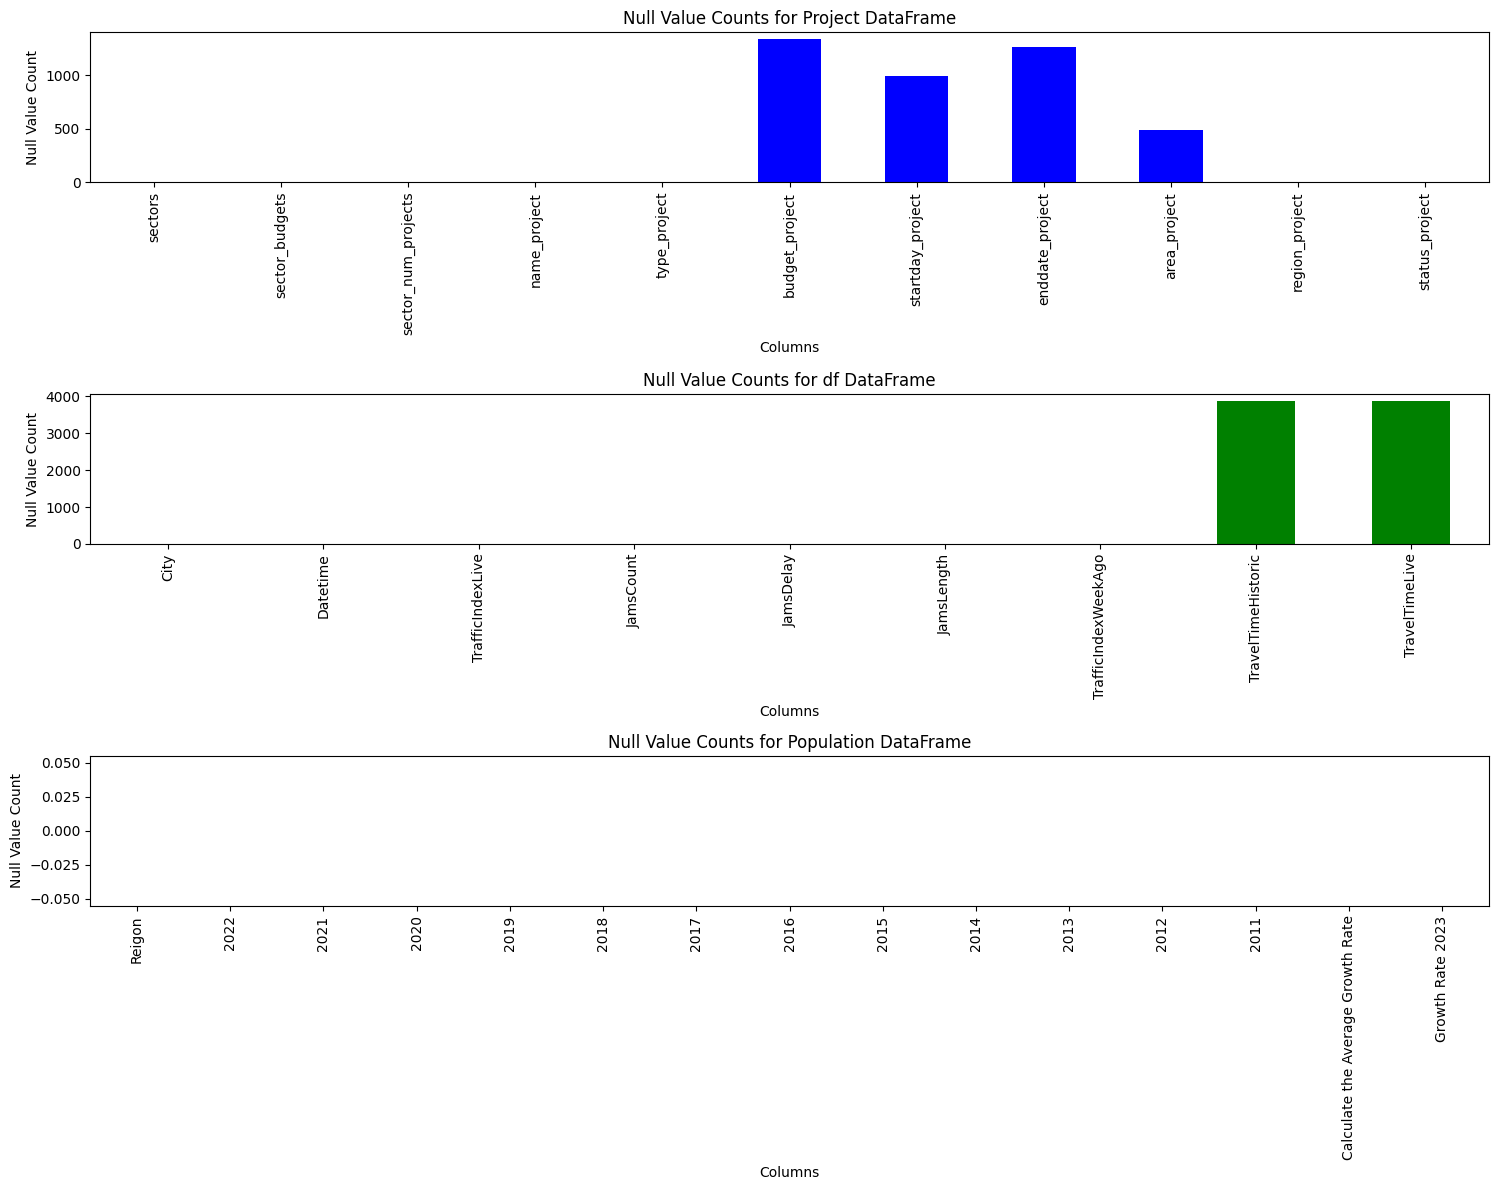

In [ ]:
# Calculate the null value counts for each dataframe
null_counts_Project = df_Project.isnull().sum()
null_counts_df = df.isnull().sum()
null_counts_Population = df_Population.isnull().sum()

# Set up a figure with 3 subplots, one for each dataframe
plt.figure(figsize=(15, 12))

# First chart for df_Project
plt.subplot(3, 1, 1)
null_counts_Project.plot(kind='bar', color='blue')
plt.title("Null Value Counts for Project DataFrame")
plt.xlabel("Columns")
plt.ylabel("Null Value Count")
plt.xticks(rotation=90)

# Second chart for df
plt.subplot(3, 1, 2)
null_counts_df.plot(kind='bar', color='green')
plt.title("Null Value Counts for df DataFrame")
plt.xlabel("Columns")
plt.ylabel("Null Value Count")
plt.xticks(rotation=90)

# Third chart for df_Population
plt.subplot(3, 1, 3)
null_counts_Population.plot(kind='bar', color='red')
plt.title("Null Value Counts for Population DataFrame")
plt.xlabel("Columns")
plt.ylabel("Null Value Count")
plt.xticks(rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


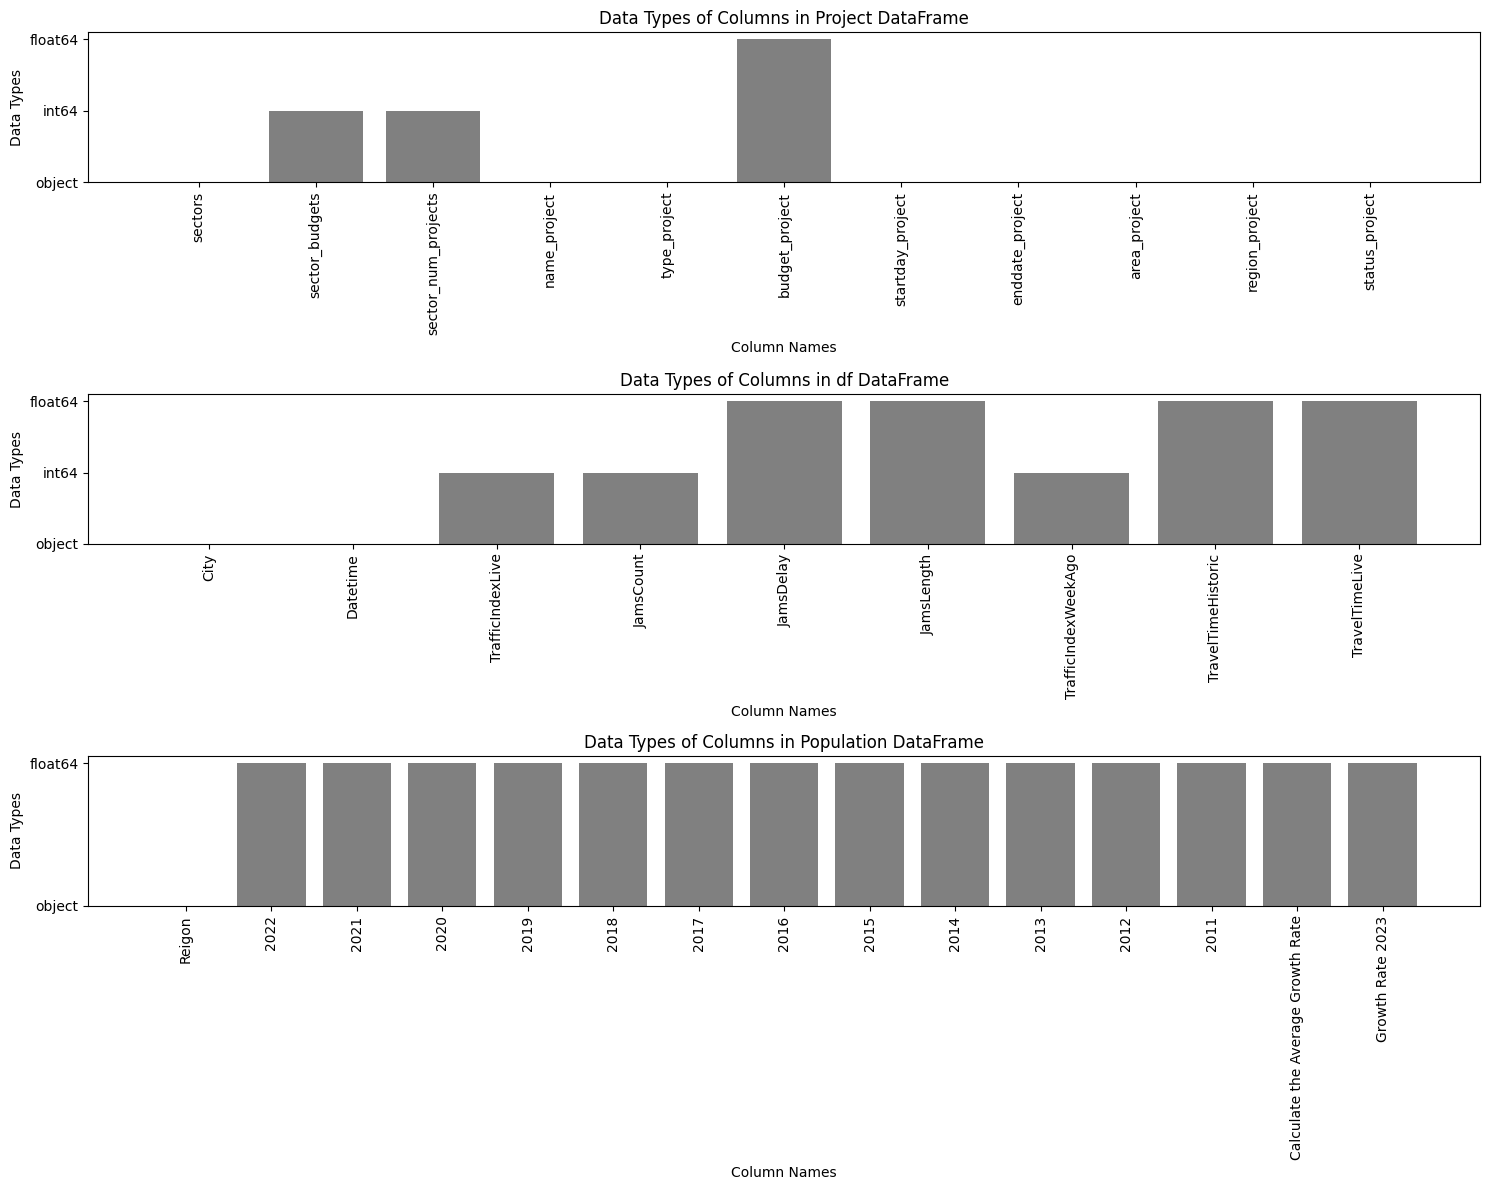

In [ ]:
# Get column names and data types for each dataframe
column_names_Project = list(df_Project.columns)
data_types_Project = [str(dtype) for dtype in df_Project.dtypes]

column_names_df = list(df.columns)
data_types_df = [str(dtype) for dtype in df.dtypes]

column_names_Population = list(df_Population.columns)
data_types_Population = [str(dtype) for dtype in df_Population.dtypes]

# Set up a figure with 3 subplots, one for each dataframe
plt.figure(figsize=(15, 12))

# First subplot for df_Project
plt.subplot(3, 1, 1)
bars_project = plt.bar(column_names_Project, data_types_Project, color='gray')
plt.title('Data Types of Columns in Project DataFrame')
plt.xlabel('Column Names')
plt.ylabel('Data Types')
plt.xticks(rotation=90)

# Second subplot for df
plt.subplot(3, 1, 2)
bars_df = plt.bar(column_names_df, data_types_df, color='gray')
plt.title('Data Types of Columns in df DataFrame')
plt.xlabel('Column Names')
plt.ylabel('Data Types')
plt.xticks(rotation=90)

# Third subplot for df_Population
plt.subplot(3, 1, 3)
bars_population = plt.bar(column_names_Population, data_types_Population, color='gray')
plt.title('Data Types of Columns in Population DataFrame')
plt.xlabel('Column Names')
plt.ylabel('Data Types')
plt.xticks(rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
print(df.Datetime)

0        2023-07-07 08:01:30
1        2023-07-07 09:01:30
2        2023-07-07 10:46:30
3        2023-07-07 11:16:30
4        2023-07-07 12:01:30
                ...         
66634    2023-12-15 03:01:30
66635    2023-12-15 04:31:30
66636    2023-12-15 05:01:30
66637    2023-12-15 06:01:30
66638    2023-12-15 07:01:30
Name: Datetime, Length: 66639, dtype: object


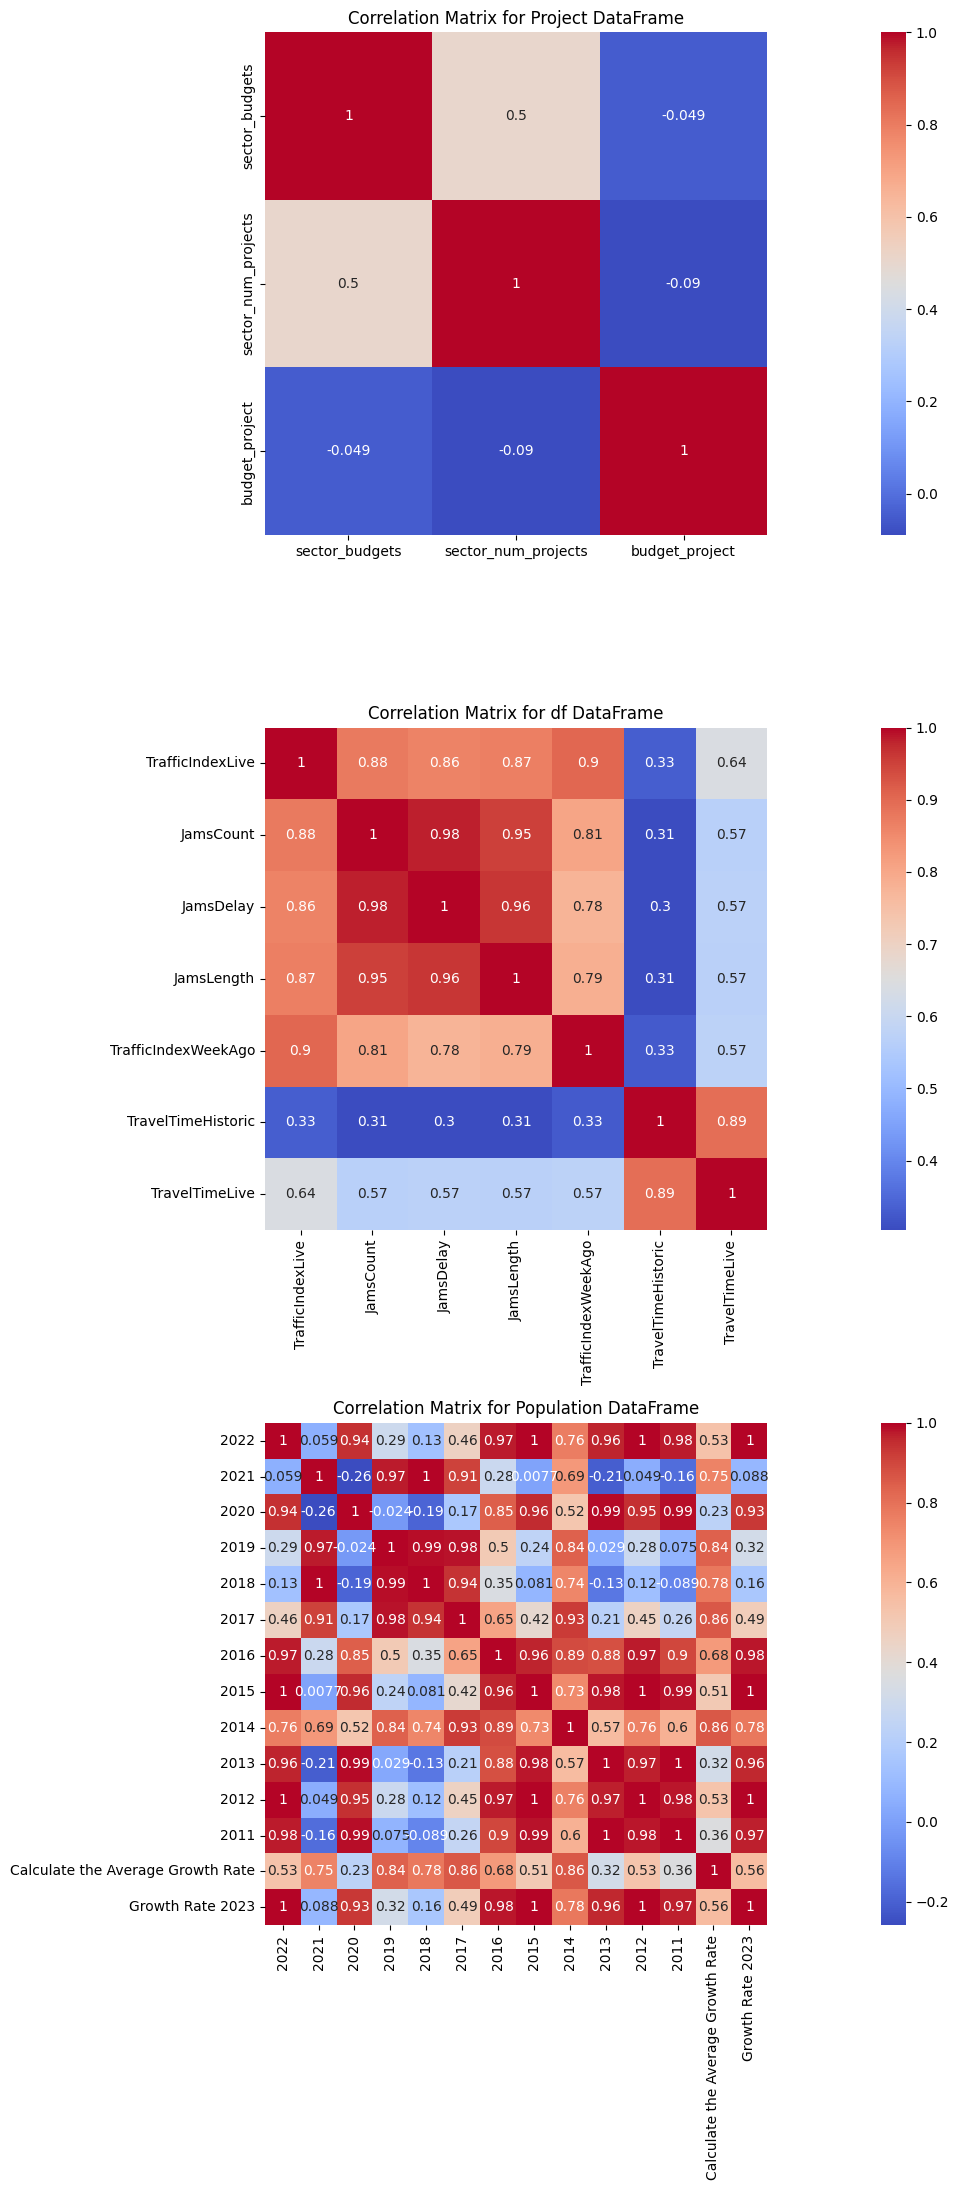

In [ ]:
# Filter numeric columns for each dataframe
numeric_df_Project = df_Project.select_dtypes(include=[np.number])
numeric_df_df = df.select_dtypes(include=[np.number])
numeric_df_Population = df_Population.select_dtypes(include=[np.number])

# Set up a figure with 3 subplots, one for each dataframe
plt.figure(figsize=(23, 22))
# First subplot for df_Project correlation matrix
plt.subplot(3, 1, 1)
sns.heatmap(numeric_df_Project.corr(), annot=True, cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix for Project DataFrame')

# Second subplot for df correlation matrix
plt.subplot(3, 1, 2)
sns.heatmap(numeric_df_df.corr(), annot=True, cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix for df DataFrame')

# Third subplot for df_Population correlation matrix
plt.subplot(3, 1, 3)
sns.heatmap(numeric_df_Population.corr(), annot=True, cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix for Population DataFrame')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
# Check distribution of the correct target variable
# sns.countplot(df['TrafficIndexLive'])  # Replace with the correct column name
# plt.title('Distribution of Traffic Congestion Levels')
# plt.show()


## b. Clean Data

In [ ]:
# Traffic Data Cleaning
df['Datetime'] = pd.to_datetime(df['Datetime'])  # Standardize datetime format
df['TravelTimeHistoric'].fillna(df.groupby('City')['TravelTimeHistoric'].transform('median'), inplace=True)
df['TravelTimeLive'].fillna(df.groupby('City')['TravelTimeLive'].transform('median'), inplace=True)

# Projects Data Cleaning
df_Project['startday_project'] = pd.to_datetime(df_Project['startday_project'], errors='coerce')
df_Project['enddate_project'] = pd.to_datetime(df_Project['enddate_project'], errors='coerce')

# Impute missing 'budget_project' with median budget per project type
df_Project['budget_project'] = df_Project.groupby('type_project')['budget_project'].transform(lambda x: x.fillna(x.median()))

# Impute missing 'area_project' based on median area per region
df_Project['area_project'] = df_Project.groupby('region_project')['area_project'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


<ipython-input-11-15fdb171ce87>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TravelTimeHistoric'].fillna(df.groupby('City')['TravelTimeHistoric'].transform('median'), inplace=True)
<ipython-input-11-15fdb171ce87>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

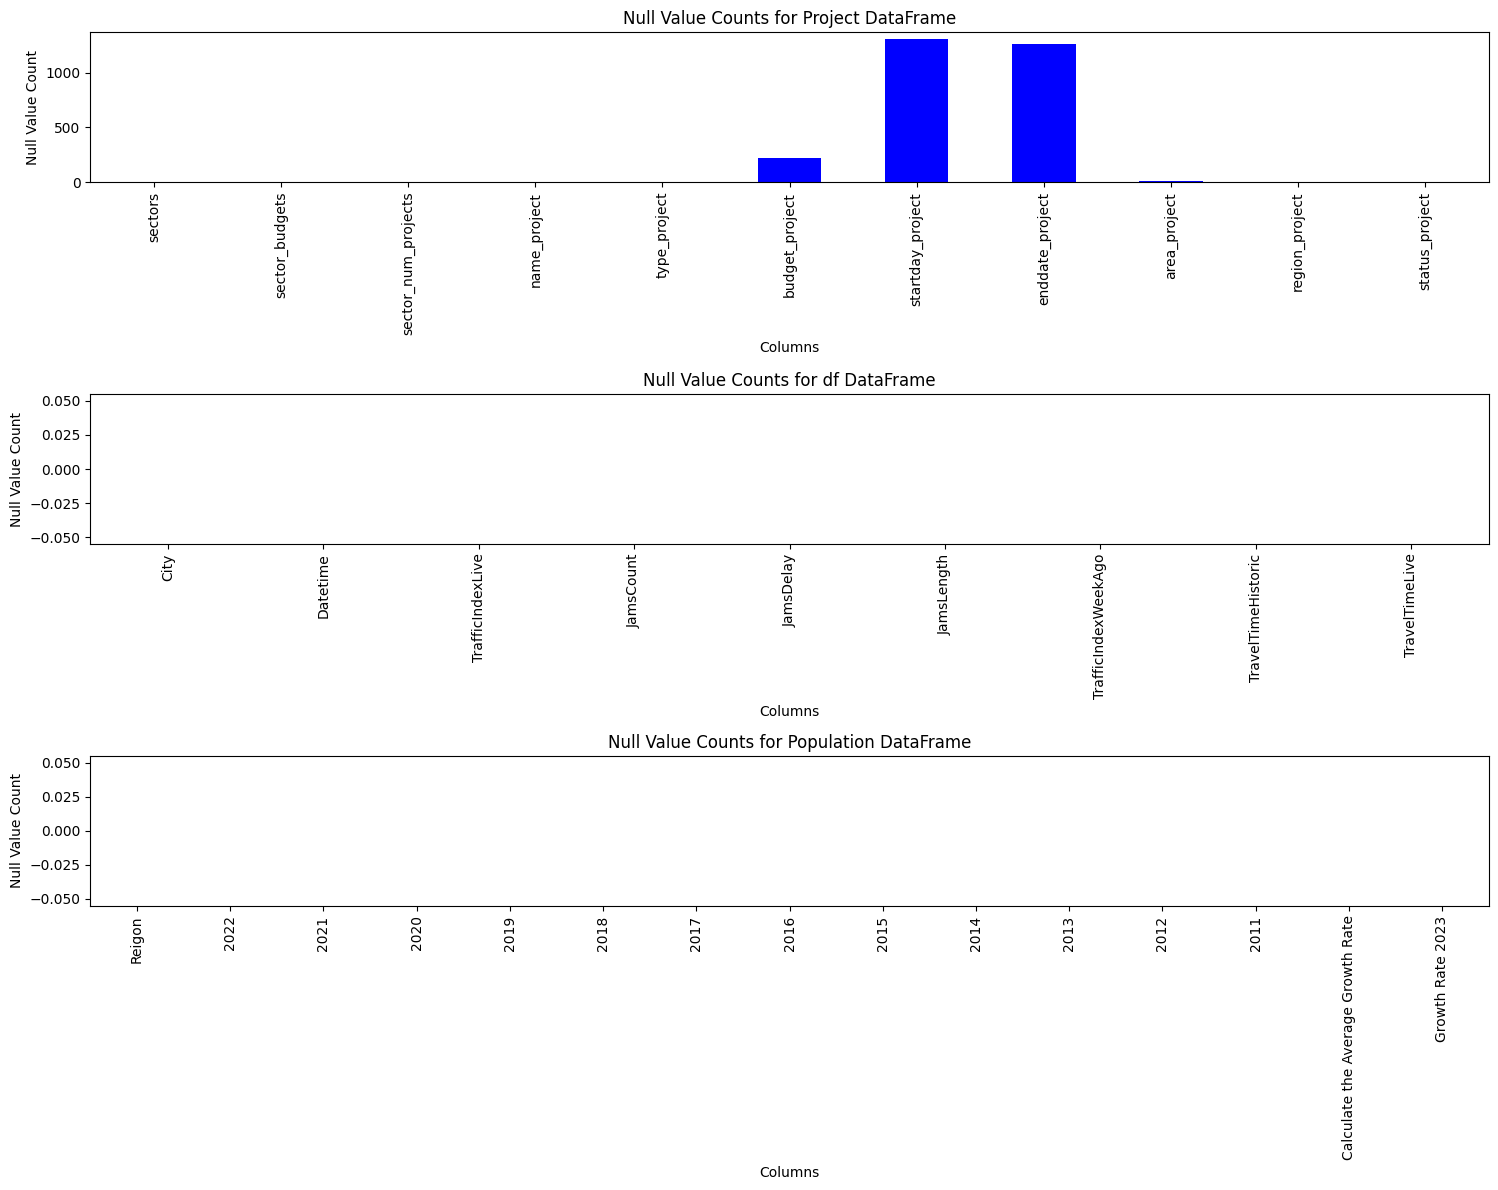

In [ ]:
# Calculate the null value counts for each dataframe
null_counts_Project = df_Project.isnull().sum()
null_counts_df = df.isnull().sum()

# Set up a figure with 3 subplots, one for each dataframe
plt.figure(figsize=(15, 12))

# First chart for df_Project
plt.subplot(3, 1, 1)
null_counts_Project.plot(kind='bar', color='blue')
plt.title("Null Value Counts for Project DataFrame")
plt.xlabel("Columns")
plt.ylabel("Null Value Count")
plt.xticks(rotation=90)

# Second chart for df
plt.subplot(3, 1, 2)
null_counts_df.plot(kind='bar', color='green')
plt.title("Null Value Counts for df DataFrame")
plt.xlabel("Columns")
plt.ylabel("Null Value Count")
plt.xticks(rotation=90)

# Third chart for df_Population
plt.subplot(3, 1, 3)
null_counts_Population.plot(kind='bar', color='red')
plt.title("Null Value Counts for Population DataFrame")
plt.xlabel("Columns")
plt.ylabel("Null Value Count")
plt.xticks(rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show();


In [ ]:
# Impute 'startday_project' by type and region
df_Project['startday_project'] = df_Project.groupby(['type_project', 'region_project'])['startday_project'] \
    .transform(lambda x: x.fillna(x.median() if not pd.isna(x.median()) else np.nan))

# Impute 'enddate_project' by type and region
df_Project['enddate_project'] = df_Project.groupby(['type_project', 'region_project'])['enddate_project'] \
    .transform(lambda x: x.fillna(x.median() if not pd.isna(x.median()) else np.nan))

# Impute remaining 'startday_project' by broader project type only
df_Project['startday_project'] = df_Project.groupby(['type_project'])['startday_project'] \
    .transform(lambda x: x.fillna(x.median() if not pd.isna(x.median()) else np.nan))

# Impute remaining 'enddate_project' by broader project type only
df_Project['enddate_project'] = df_Project.groupby(['type_project'])['enddate_project'] \
    .transform(lambda x: x.fillna(x.median() if not pd.isna(x.median()) else np.nan))

# Drop rows where both start and end dates are still missing
projects_data = df_Project.dropna(subset=['startday_project', 'enddate_project'], how='all')


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [ ]:
# Re-check missing values summary
missing_summary = projects_data[['startday_project', 'enddate_project']].isnull().mean() * 100
print("Percentage of Missing Values After Imputation:\n", missing_summary)


Percentage of Missing Values After Imputation:
 startday_project    5.740922
enddate_project     5.299313
dtype: float64


In [ ]:
# Feature Engineering: Extracting day of the week, hour, etc., from the 'Datetime' column
df['Datetime'] = pd.to_datetime(df['Datetime'])  # Convert 'Datetime' to datetime format

# Extracting year, hour and day of the week
df['hour'] = df['Datetime'].dt.hour
df['day_of_week'] = df['Datetime'].dt.dayofweek
df['year'] = df['Datetime'].dt.year

# Check the newly created columns
print(df[['Datetime', 'hour', 'day_of_week', 'year']].head())


             Datetime  hour  day_of_week  year
0 2023-07-07 08:01:30     8            4  2023
1 2023-07-07 09:01:30     9            4  2023
2 2023-07-07 10:46:30    10            4  2023
3 2023-07-07 11:16:30    11            4  2023
4 2023-07-07 12:01:30    12            4  2023


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   City                 66639 non-null  object        
 1   Datetime             66639 non-null  datetime64[ns]
 2   TrafficIndexLive     66639 non-null  int64         
 3   JamsCount            66639 non-null  int64         
 4   JamsDelay            66639 non-null  float64       
 5   JamsLength           66639 non-null  float64       
 6   TrafficIndexWeekAgo  66639 non-null  int64         
 7   TravelTimeHistoric   66639 non-null  float64       
 8   TravelTimeLive       66639 non-null  float64       
 9   hour                 66639 non-null  int32         
 10  day_of_week          66639 non-null  int32         
 11  year                 66639 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(3), object(1)
memory usage: 5.3+ MB


In [ ]:
df_Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   sectors              2182 non-null   object        
 1   sector_budgets       2182 non-null   int64         
 2   sector_num_projects  2182 non-null   int64         
 3   name_project         2182 non-null   object        
 4   type_project         2182 non-null   object        
 5   budget_project       1960 non-null   float64       
 6   startday_project     1921 non-null   datetime64[ns]
 7   enddate_project      1930 non-null   datetime64[ns]
 8   area_project         2168 non-null   object        
 9   region_project       2181 non-null   object        
 10  status_project       2182 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 187.6+ KB


In [ ]:
df_Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Reigon                             5 non-null      object 
 1   2022                               5 non-null      float64
 2   2021                               5 non-null      float64
 3   2020                               5 non-null      float64
 4   2019                               5 non-null      float64
 5   2018                               5 non-null      float64
 6   2017                               5 non-null      float64
 7   2016                               5 non-null      float64
 8   2015                               5 non-null      float64
 9   2014                               5 non-null      float64
 10  2013                               5 non-null      float64
 11  2012                               5 non-null      float64
 12

In [ ]:
df['City'].unique()

array(['Abudhabi', 'Al-ain', 'Cairo', 'Dammam', 'Doha', 'Dubai', 'Jeddah',
       'Kuwait', 'Mecca', 'Medina', 'Riyadh'], dtype=object)

In [ ]:
# List of Saudi cities
saudi_cities = ['Riyadh', 'Dammam', 'Jeddah', 'Mecca', 'Medina']

# Filter the traffic data to include only rows with cities in the Saudi list
traffic_data = df[df['City'].isin(saudi_cities)]

# Check the unique cities in the filtered data
print(traffic_data['City'].unique())


['Dammam' 'Jeddah' 'Mecca' 'Medina' 'Riyadh']


In [ ]:
df_Project.head()

,sectors,sector_budgets,sector_num_projects,name_project,type_project,budget_project,startday_project,enddate_project,area_project,region_project,status_project
0,تجاري,1058790791316,902,برج غرفة الشرقية الاستثماري – Asharqia Chamber...,تجاري,3.350000e+08,2019-03-07,2021-12-31,"7,752 متر مربع","المنطقة الشرقية, الدمام",تحت الإنشاء
1,تجاري,1058790791316,902,مقر برايس ووتر هاوس كوبرز – PWC Headquarter ...,"تجاري, سكني",3.000000e+08,2010-01-01,2017-06-30,"8,000 متر مربع","منطقة الرياض, الرياض",تحت الإنشاء
2,تجاري,1058790791316,902,مقر المدفوعات السعودية – Saudi Payment Headqua...,"تجاري, سكني",1.178000e+09,2009-01-01,2014-12-31,"19,500 متر مربع","منطقة الرياض, الرياض",مكتمل
3,تجاري,1058790791316,902,الاحساء ستريب مول – Ahsa Strip Mall ...,تجاري,6.650000e+07,2016-01-06,2017-04-01,"19,888 متر مربع","المنطقة الشرقية, الأحساء",معلن عنه
4,تجاري,1058790791316,902,برج الدايل – Al-Dailh Tower,"فندقي, تجاري",1.200000e+08,2019-01-06,2022-03-31,"3,651 متر مربع","منطقة مكة المكرمة, جدة",تحت الإنشاء


In [ ]:
df_Project['type_project'].unique()

array(['تجاري', 'تجاري, سكني', 'فندقي, تجاري', 'فندقي, تجاري, صناعي',
       'فندقي, تجاري, ترفيهي/سياحي, علمي', 'فندقي, تجاري, ترفيهي/سياحي',
       'تجاري, سكني, صناعي', 'تجاري, صناعي',
       'فندقي, البنية التحتية, تجاري, ترفيهي/سياحي, حكومي',
       'فندقي, تجاري, سكني',
       'فندقي, البنية التحتية, تجاري, ترفيهي/سياحي, ديني/خيري, سكني',
       'تجاري, ترفيهي/سياحي', 'البنية التحتية, تجاري',
       'فندقي, البنية التحتية, تجاري, ترفيهي/سياحي, سكني',
       'فندقي, البنية التحتية, تجاري, ترفيهي/سياحي, رياضي, سكني',
       'تجاري, صحي', 'تجاري, تعليمي',
       'فندقي, البنية التحتية, تجاري, سكني', 'تجاري, ديني/خيري, سكني',
       'تجاري, تعليمي, ديني/خيري, سكني, صحي', 'فندقي, تجاري, حكومي, صحي',
       'فندقي, البنية التحتية, تجاري, ترفيهي/سياحي, حكومي, سكني, صحي',
       'فندقي, تجاري, ديني/خيري', 'تجاري, حكومي',
       'البنية التحتية, تجاري, سكني, صناعي', 'فندقي, تجاري, حكومي, سكني',
       'فندقي, تجاري, ترفيهي/سياحي, حكومي',
       'فندقي, تجاري, ترفيهي/سياحي, سكني', 'تجاري, 

In [ ]:
df_Project['sectors'].unique()

array([' تجاري', ' ترفيهي/سياحي', ' تعليمي', ' حكومي', ' ديني/خيري',
       ' رياضي', ' سكني', ' علمي', ' صناعي', ' صحي'], dtype=object)

In [ ]:
df_Project['region_project'].unique()

array(['المنطقة الشرقية, الدمام', 'منطقة الرياض, الرياض',
       'المنطقة الشرقية, الأحساء', 'منطقة مكة المكرمة, جدة',
       'منطقة مكة المكرمة, الطائف',
       'منطقة مكة المكرمة, مدينة الملك عبدالله الاقتصادية',
       'منطقة عسير, أبها', 'نجران, منطقة نجران',
       'مكة المكرمة, منطقة مكة المكرمة', 'المنطقة الشرقية, الخبر',
       'منطقة القصيم, بريدة', 'منطقة عسير, بيشة', 'منطقة الباحة, بلجرشي',
       'منطقة جازان, جازان', 'منطقة تبوك, شرما',
       'منطقة المدينة المنورة, المدينة المنورة', 'القدية',
       'المنطقة الشرقية, الجبيل', 'منطقة الباحة, الباحة',
       'منطقة القصيم, عنيزة', 'منطقة الحدود الشمالية, عرعر',
       'وعد الشمال, منطقة الحدود الشمالية', 'منطقة الرياض, الدرعية',
       'المنطقة الشرقية, الجبيل الصناعية', 'منطقة حائل, حائل', nan,
       'منطقة الرياض, المزاحمية', 'منطقة القصيم, الرس',
       'ينبع, الأحساء, الجبيل الصناعية, الخرج, الطائف, عنيزة',
       'منطقة الرياض, مدينة سدير للصناعة والأعمال',
       'منطقة القصيم, البكيرية', 'منطقة تبوك', 'المنطقة الشر

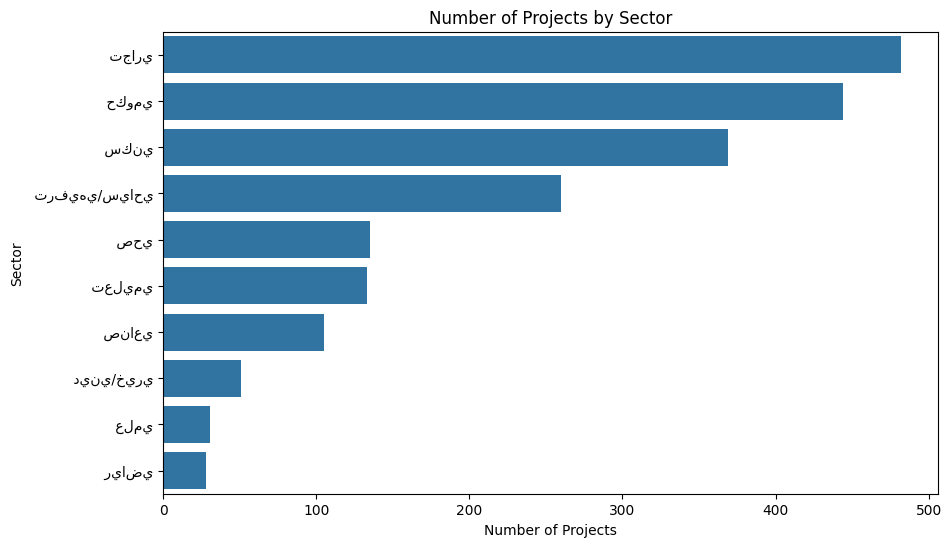

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=projects_data, y='sectors', order=projects_data['sectors'].value_counts().index)
plt.title('Number of Projects by Sector')
plt.xlabel('Number of Projects')
plt.ylabel('Sector')
plt.show()


In [ ]:
# One-hot encoding
sector_dummies = pd.get_dummies(df_Project['sectors'], prefix='sector')
projects_data = pd.concat([df_Project, sector_dummies], axis=1)


In [ ]:
projects_data.head()

,sectors,sector_budgets,sector_num_projects,name_project,type_project,budget_project,startday_project,enddate_project,area_project,region_project,...,sector_ تجاري,sector_ ترفيهي/سياحي,sector_ تعليمي,sector_ حكومي,sector_ ديني/خيري,sector_ رياضي,sector_ سكني,sector_ صحي,sector_ صناعي,sector_ علمي
0,تجاري,1058790791316,902,برج غرفة الشرقية الاستثماري – Asharqia Chamber...,تجاري,3.350000e+08,2019-03-07,2021-12-31,"7,752 متر مربع","المنطقة الشرقية, الدمام",...,True,False,False,False,False,False,False,False,False,False
1,تجاري,1058790791316,902,مقر برايس ووتر هاوس كوبرز – PWC Headquarter ...,"تجاري, سكني",3.000000e+08,2010-01-01,2017-06-30,"8,000 متر مربع","منطقة الرياض, الرياض",...,True,False,False,False,False,False,False,False,False,False
2,تجاري,1058790791316,902,مقر المدفوعات السعودية – Saudi Payment Headqua...,"تجاري, سكني",1.178000e+09,2009-01-01,2014-12-31,"19,500 متر مربع","منطقة الرياض, الرياض",...,True,False,False,False,False,False,False,False,False,False
3,تجاري,1058790791316,902,الاحساء ستريب مول – Ahsa Strip Mall ...,تجاري,6.650000e+07,2016-01-06,2017-04-01,"19,888 متر مربع","المنطقة الشرقية, الأحساء",...,True,False,False,False,False,False,False,False,False,False
4,تجاري,1058790791316,902,برج الدايل – Al-Dailh Tower,"فندقي, تجاري",1.200000e+08,2019-01-06,2022-03-31,"3,651 متر مربع","منطقة مكة المكرمة, جدة",...,True,False,False,False,False,False,False,False,False,False


In [ ]:
df_Project['region_project'].unique()

array(['المنطقة الشرقية, الدمام', 'منطقة الرياض, الرياض',
       'المنطقة الشرقية, الأحساء', 'منطقة مكة المكرمة, جدة',
       'منطقة مكة المكرمة, الطائف',
       'منطقة مكة المكرمة, مدينة الملك عبدالله الاقتصادية',
       'منطقة عسير, أبها', 'نجران, منطقة نجران',
       'مكة المكرمة, منطقة مكة المكرمة', 'المنطقة الشرقية, الخبر',
       'منطقة القصيم, بريدة', 'منطقة عسير, بيشة', 'منطقة الباحة, بلجرشي',
       'منطقة جازان, جازان', 'منطقة تبوك, شرما',
       'منطقة المدينة المنورة, المدينة المنورة', 'القدية',
       'المنطقة الشرقية, الجبيل', 'منطقة الباحة, الباحة',
       'منطقة القصيم, عنيزة', 'منطقة الحدود الشمالية, عرعر',
       'وعد الشمال, منطقة الحدود الشمالية', 'منطقة الرياض, الدرعية',
       'المنطقة الشرقية, الجبيل الصناعية', 'منطقة حائل, حائل', nan,
       'منطقة الرياض, المزاحمية', 'منطقة القصيم, الرس',
       'ينبع, الأحساء, الجبيل الصناعية, الخرج, الطائف, عنيزة',
       'منطقة الرياض, مدينة سدير للصناعة والأعمال',
       'منطقة القصيم, البكيرية', 'منطقة تبوك', 'المنطقة الشر

In [ ]:
print(projects_data.columns)

Index(['sectors', 'sector_budgets', 'sector_num_projects', 'name_project',
       'type_project', 'budget_project', 'startday_project', 'enddate_project',
       'area_project', 'region_project', 'status_project', 'sector_ تجاري',
       'sector_ ترفيهي/سياحي', 'sector_ تعليمي', 'sector_ حكومي',
       'sector_ ديني/خيري', 'sector_ رياضي', 'sector_ سكني', 'sector_ صحي',
       'sector_ صناعي', 'sector_ علمي'],
      dtype='object')


In [ ]:
# List of target cities with their corresponding regions
target_cities = [
    'منطقة الرياض, الرياض',           # Riyadh
    'المنطقة الشرقية, الدمام',         # Dammam
    'منطقة مكة المكرمة, جدة',          # Jeddah
    'مكة المكرمة, منطقة مكة المكرمة',  # Mecca
    'منطقة المدينة المنورة, المدينة المنورة'  # Medina
]

# Filter the DataFrame for the target cities
filtered_projects = projects_data[projects_data['region_project'].isin(target_cities)]

# Display the filtered DataFrame
print(filtered_projects)

     sectors  sector_budgets  sector_num_projects  \
0      تجاري   1058790791316                  902   
1      تجاري   1058790791316                  902   
2      تجاري   1058790791316                  902   
4      تجاري   1058790791316                  902   
5      تجاري   1058790791316                  902   
...      ...             ...                  ...   
2176     صحي    549859453510                  150   
2177     صحي    549859453510                  150   
2178     صحي    549859453510                  150   
2180     صحي    549859453510                  150   
2181     صحي    549859453510                  150   

                                           name_project  \
0     برج غرفة الشرقية الاستثماري – Asharqia Chamber...   
1     مقر برايس ووتر هاوس كوبرز – PWC Headquarter   ...   
2     مقر المدفوعات السعودية – Saudi Payment Headqua...   
4         برج الدايل – Al-Dailh Tower                     
5           برج سماسكو – SMASCO Tower                     
...      

In [ ]:
# Normalize the project budget column
filtered_projects['budget_project'] = (filtered_projects['budget_project'] - filtered_projects['budget_project'].min()) / (filtered_projects['budget_project'].max() - filtered_projects['budget_project'].min())

<ipython-input-31-65fbd93a9cad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_projects['budget_project'] = (filtered_projects['budget_project'] - filtered_projects['budget_project'].min()) / (filtered_projects['budget_project'].max() - filtered_projects['budget_project'].min())


In [ ]:
filtered_projects.head()

,sectors,sector_budgets,sector_num_projects,name_project,type_project,budget_project,startday_project,enddate_project,area_project,region_project,...,sector_ تجاري,sector_ ترفيهي/سياحي,sector_ تعليمي,sector_ حكومي,sector_ ديني/خيري,sector_ رياضي,sector_ سكني,sector_ صحي,sector_ صناعي,sector_ علمي
0,تجاري,1058790791316,902,برج غرفة الشرقية الاستثماري – Asharqia Chamber...,تجاري,0.003701,2019-03-07,2021-12-31,"7,752 متر مربع","المنطقة الشرقية, الدمام",...,True,False,False,False,False,False,False,False,False,False
1,تجاري,1058790791316,902,مقر برايس ووتر هاوس كوبرز – PWC Headquarter ...,"تجاري, سكني",0.003311,2010-01-01,2017-06-30,"8,000 متر مربع","منطقة الرياض, الرياض",...,True,False,False,False,False,False,False,False,False,False
2,تجاري,1058790791316,902,مقر المدفوعات السعودية – Saudi Payment Headqua...,"تجاري, سكني",0.013100,2009-01-01,2014-12-31,"19,500 متر مربع","منطقة الرياض, الرياض",...,True,False,False,False,False,False,False,False,False,False
4,تجاري,1058790791316,902,برج الدايل – Al-Dailh Tower,"فندقي, تجاري",0.001304,2019-01-06,2022-03-31,"3,651 متر مربع","منطقة مكة المكرمة, جدة",...,True,False,False,False,False,False,False,False,False,False
5,تجاري,1058790791316,902,برج سماسكو – SMASCO Tower,"تجاري, سكني",0.003311,2014-11-02,2017-06-30,"4,100 متر مربع","منطقة الرياض, الرياض",...,True,False,False,False,False,False,False,False,False,False


In [ ]:
filtered_projects['region_project'].unique()

array(['المنطقة الشرقية, الدمام', 'منطقة الرياض, الرياض',
       'منطقة مكة المكرمة, جدة', 'مكة المكرمة, منطقة مكة المكرمة',
       'منطقة المدينة المنورة, المدينة المنورة'], dtype=object)

In [ ]:
# Mapping Saudi cities
saudi_cities = {'منطقة الرياض, الرياض' : 'Riyadh',
                 'المنطقة الشرقية, الدمام' : 'Dammam',
                 'منطقة مكة المكرمة, جدة' : 'Jeddah',
                 'مكة المكرمة, منطقة مكة المكرمة' : 'Mecca',
                 'منطقة المدينة المنورة, المدينة المنورة' : 'Medina'}
filtered_projects['region_project'] = filtered_projects['region_project'].replace(saudi_cities)

<ipython-input-34-b6cdb6560161>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_projects['region_project'] = filtered_projects['region_project'].replace(saudi_cities)


In [ ]:
filtered_projects['region_project'].unique()

array(['Dammam', 'Riyadh', 'Jeddah', 'Mecca', 'Medina'], dtype=object)

In [ ]:
filtered_projects.head()

,sectors,sector_budgets,sector_num_projects,name_project,type_project,budget_project,startday_project,enddate_project,area_project,region_project,...,sector_ تجاري,sector_ ترفيهي/سياحي,sector_ تعليمي,sector_ حكومي,sector_ ديني/خيري,sector_ رياضي,sector_ سكني,sector_ صحي,sector_ صناعي,sector_ علمي
0,تجاري,1058790791316,902,برج غرفة الشرقية الاستثماري – Asharqia Chamber...,تجاري,0.003701,2019-03-07,2021-12-31,"7,752 متر مربع",Dammam,...,True,False,False,False,False,False,False,False,False,False
1,تجاري,1058790791316,902,مقر برايس ووتر هاوس كوبرز – PWC Headquarter ...,"تجاري, سكني",0.003311,2010-01-01,2017-06-30,"8,000 متر مربع",Riyadh,...,True,False,False,False,False,False,False,False,False,False
2,تجاري,1058790791316,902,مقر المدفوعات السعودية – Saudi Payment Headqua...,"تجاري, سكني",0.013100,2009-01-01,2014-12-31,"19,500 متر مربع",Riyadh,...,True,False,False,False,False,False,False,False,False,False
4,تجاري,1058790791316,902,برج الدايل – Al-Dailh Tower,"فندقي, تجاري",0.001304,2019-01-06,2022-03-31,"3,651 متر مربع",Jeddah,...,True,False,False,False,False,False,False,False,False,False
5,تجاري,1058790791316,902,برج سماسكو – SMASCO Tower,"تجاري, سكني",0.003311,2014-11-02,2017-06-30,"4,100 متر مربع",Riyadh,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
df_Population.head()

,Reigon,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,Calculate the Average Growth Rate,Growth Rate 2023
0,Riyadh,0.050930,-0.029330,0.055537,-0.006402,-0.029589,0.000533,0.042529,0.059269,0.026738,0.062159,0.048250,0.052651,0.027773,0.052344
1,Makkah,0.042806,-0.036372,0.049290,-0.013970,-0.037959,-0.007039,0.034384,0.051159,0.018642,0.055284,0.040647,0.045673,0.024255,0.043845
2,East,0.050265,-0.021920,0.052548,-0.001344,-0.022081,0.003769,0.042980,0.058540,0.028881,0.060041,0.047585,0.050854,0.035012,0.052025
3,Madinah,0.041273,-0.020435,0.045512,-0.002515,-0.021451,0.001601,0.035248,0.048829,0.023876,0.050904,0.039058,0.041793,0.028369,0.042444
4,Grand Total,0.045180,-0.024344,0.049518,-0.004387,-0.025214,0.000748,0.038161,0.053237,0.024807,0.055606,0.042922,0.046432,0.030267,0.046548


In [ ]:
df_Population.groupby(df_Population.Reigon).describe()

2022                                                        \
            count      mean std       min       25%       50%       75%   
Reigon                                                                    
East          1.0  0.050265 NaN  0.050265  0.050265  0.050265  0.050265   
Grand Total   1.0  0.045180 NaN  0.045180  0.045180  0.045180  0.045180   
Madinah       1.0  0.041273 NaN  0.041273  0.041273  0.041273  0.041273   
Makkah        1.0  0.042806 NaN  0.042806  0.042806  0.042806  0.042806   
Riyadh        1.0  0.050930 NaN  0.050930  0.050930  0.050930  0.050930   

                       2021            ... Calculate the Average Growth Rate  \
                  max count      mean  ...                               75%   
Reigon                                 ...                                     
East         0.050265   1.0 -0.021920  ...                          0.035012   
Grand Total  0.045180   1.0 -0.024344  ...                          0.030267   
Madinah      0.041273   1.0 -0.020435  ...                          0.028369   
Makkah       0.042806   1.0 -0.036372  ...                          0.024255   
Riyadh       0.050930   1.0 -0.029330  ...                          0.027773   

                      Growth Rate 2023                                    \
                  max            count      mean std       min       25%   
Reigon                                                                     
East         0.035012              1.0  0.052025 NaN  0.052025  0.052025   
Grand Total  0.030267              1.0  0.046548 NaN  0.046548  0.046548   
Madinah      0.028369              1.0  0.042444 NaN  0.042444  0.042444   
Makkah       0.024255              1.0  0.043845 NaN  0.043845  0.043845   
Riyadh       0.027773              1.0  0.052344 NaN  0.052344  0.052344   

                                           
                  50%       75%       max  
Reigon                                     
East         0.052025  0.052025  0.052025  
Grand Total  0.046548  0.046548  0.046548  
Madinah      0.042444  0.042444  0.042444  
Makkah       0.043845  0.043845  0.043845  
Riyadh       0.052344  0.052344  0.052344  

[5 rows x 112 columns]

In [ ]:
# Rearange columns in population data
df_Population.set_index('Reigon', inplace=True)
df_Population.rename(columns={'Growth Rate 2023' : '2023', 'Calculate the Average Growth Rate' : 'Average Growth Rate'}, inplace=True)  # Rename a couble of columns
column_2023 = df_Population.pop('2023')
df_Population.insert(0, '2023', column_2023)
df_Population = df_Population.iloc[:, ::-1]  # Reverse the order of columns
df_Population.columns

Index(['Average Growth Rate', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [ ]:
df_Population.head()

,Average Growth Rate,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Reigon,,,,,,,,,,,,,,
Riyadh,0.027773,0.052651,0.048250,0.062159,0.026738,0.059269,0.042529,0.000533,-0.029589,-0.006402,0.055537,-0.029330,0.050930,0.052344
Makkah,0.024255,0.045673,0.040647,0.055284,0.018642,0.051159,0.034384,-0.007039,-0.037959,-0.013970,0.049290,-0.036372,0.042806,0.043845
East,0.035012,0.050854,0.047585,0.060041,0.028881,0.058540,0.042980,0.003769,-0.022081,-0.001344,0.052548,-0.021920,0.050265,0.052025
Madinah,0.028369,0.041793,0.039058,0.050904,0.023876,0.048829,0.035248,0.001601,-0.021451,-0.002515,0.045512,-0.020435,0.041273,0.042444
Grand Total,0.030267,0.046432,0.042922,0.055606,0.024807,0.053237,0.038161,0.000748,-0.025214,-0.004387,0.049518,-0.024344,0.045180,0.046548


<Figure size 1000x600 with 0 Axes>

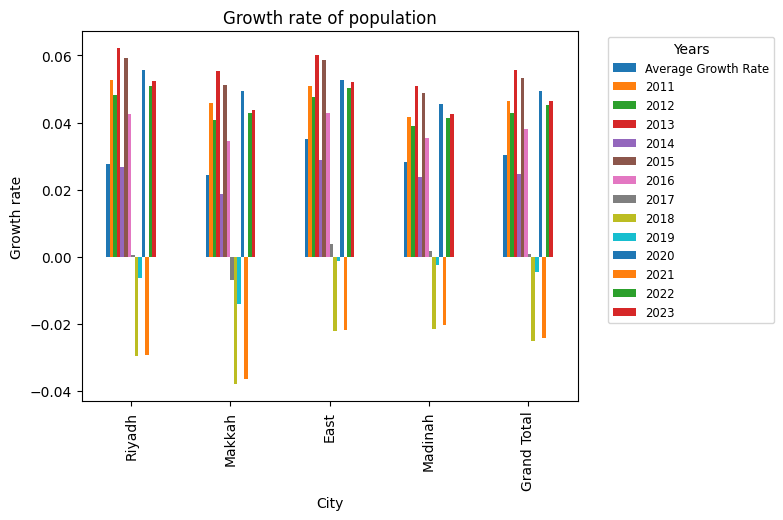

In [ ]:
# Plot the population data
plt.figure(figsize=(10, 6))
df_Population.plot(kind = 'bar')
plt.title('Growth rate of population')
plt.xlabel('City')
plt.ylabel('Growth rate')
plt.legend(title='Years', bbox_to_anchor=(1.05, 1), fontsize='small')
plt.show()

In [ ]:
threshold=3

for column in df.columns:
 if column != 'TrafficIndexLive' and df[column].dtype == 'float':
            z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
            # Replace outliers with NaNs
            df[column] = np.where(z_scores > threshold, np.nan, df[column])


df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,hour,day_of_week,year
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617,8,4,2023
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629,9,4,2023
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834,10,4,2023
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917,11,4,2023
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246,12,4,2023


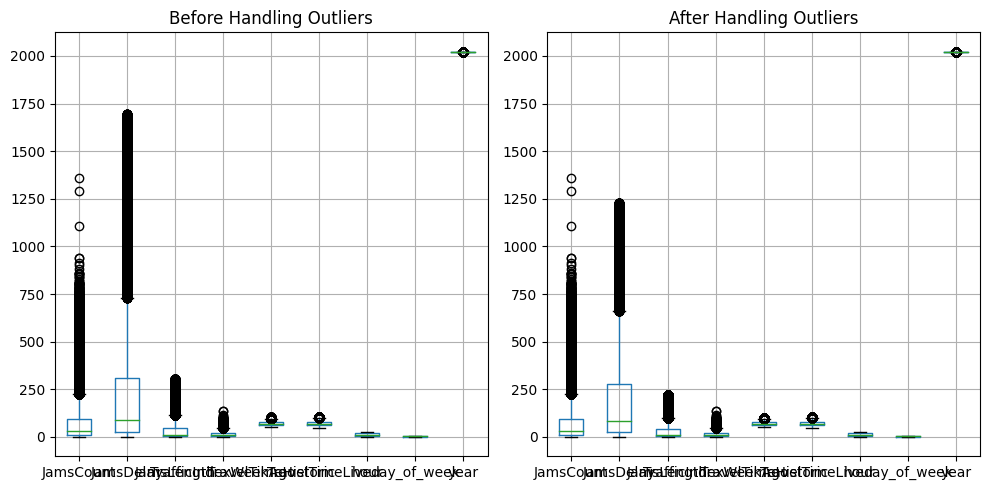

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

threshold = 3

# Create a copy of the original data for comparison
original_data = df.copy()

# Handling outliers
for column in df.columns:
    if column != 'price' and df[column].dtype == 'float':
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        df[column] = np.where(z_scores > threshold, np.nan, df[column])

# Plotting box plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Box plot before handling outliers
axes[0].set_title('Before Handling Outliers')
original_data.drop('TrafficIndexLive', axis=1).boxplot(ax=axes[0])

# Box plot after handling outliers
axes[1].set_title('After Handling Outliers')
df.drop('TrafficIndexLive', axis=1).boxplot(ax=axes[1])

plt.tight_layout()
plt.show()

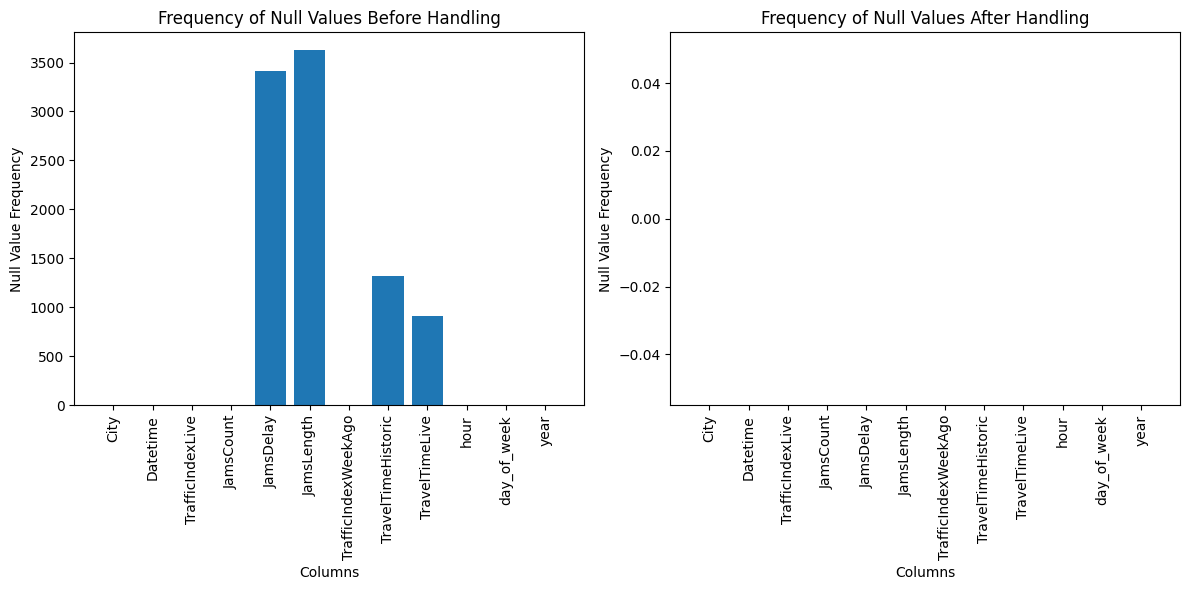

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Replace 'Unknown' values with null
df = df.replace('Unknown', np.nan)

# Calculate null value frequencies before handling
null_freq_before = df.isnull().sum()

# Handle null values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    elif df[column].dtype == 'float':
        df[column] = df[column].fillna(df[column].mean())

# Calculate null value frequencies after handling
null_freq_after = df.isnull().sum()

# Create figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot null frequencies before handling
axes[0].bar(null_freq_before.index, null_freq_before.values)
axes[0].set_title('Frequency of Null Values Before Handling')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Null Value Frequency')
axes[0].tick_params(axis='x', rotation=90)

# Plot null frequencies after handling
axes[1].bar(null_freq_after.index, null_freq_after.values)
axes[1].set_title('Frequency of Null Values After Handling')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Null Value Frequency')
axes[1].tick_params(axis='x', rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
print(df.isnull().sum())

City                   0
Datetime               0
TrafficIndexLive       0
JamsCount              0
JamsDelay              0
JamsLength             0
TrafficIndexWeekAgo    0
TravelTimeHistoric     0
TravelTimeLive         0
hour                   0
day_of_week            0
year                   0
dtype: int64


In [ ]:
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,hour,day_of_week,year
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617,8,4,2023
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629,9,4,2023
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834,10,4,2023
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917,11,4,2023
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246,12,4,2023


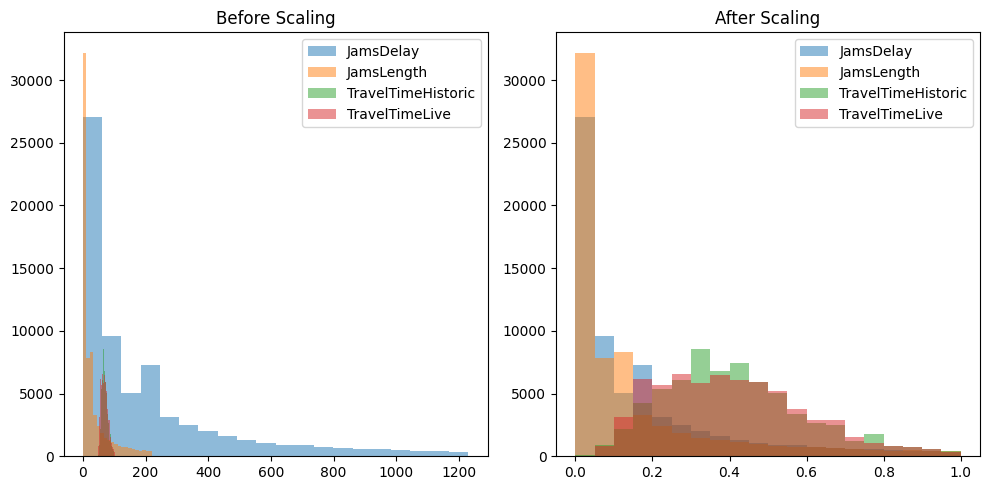

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the original data for comparison
original_data = df.copy()

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plotting histogram before scaling
axes[0].set_title('Before Scaling')
for column in df.columns:
    if df[column].dtype == 'float':
        axes[0].hist(df[column], bins=20, alpha=0.5, label=column)
axes[0].legend()

# Scaling the data
for column in df.columns:
    if df[column].dtype == 'float':
        df[column] = min_max_scaler.fit_transform(df[[column]])

# Plotting histogram after scaling
axes[1].set_title('After Scaling')
for column in df.columns:
    if df[column].dtype == 'float':
        axes[1].hist(df[column], bins=20, alpha=0.5, label=column)
axes[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [ ]:
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,hour,day_of_week,year
0,Abudhabi,2023-07-07 08:01:30,6,4,0.012685,0.003150,13,0.204465,0.143790,8,4,2023
1,Abudhabi,2023-07-07 09:01:30,7,7,0.016669,0.007651,8,0.216646,0.167190,9,4,2023
2,Abudhabi,2023-07-07 10:46:30,7,8,0.020329,0.012601,6,0.195473,0.156517,10,4,2023
3,Abudhabi,2023-07-07 11:16:30,8,11,0.024882,0.024752,6,0.206988,0.172445,11,4,2023
4,Abudhabi,2023-07-07 12:01:30,8,20,0.050496,0.029253,5,0.191402,0.166134,12,4,2023


In [ ]:
# Convert 'Datetime' to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extracting hour, day of the week, year, and month
df['hour'] = df['Datetime'].dt.hour
df['day_of_week'] = df['Datetime'].dt.dayofweek
df['year'] = df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month

# Check the newly created columns
print(df[['Datetime', 'hour', 'day_of_week', 'year', 'month']].head())

             Datetime  hour  day_of_week  year  month
0 2023-07-07 08:01:30     8            4  2023      7
1 2023-07-07 09:01:30     9            4  2023      7
2 2023-07-07 10:46:30    10            4  2023      7
3 2023-07-07 11:16:30    11            4  2023      7
4 2023-07-07 12:01:30    12            4  2023      7


In [ ]:
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,hour,day_of_week,year,month
0,Abudhabi,2023-07-07 08:01:30,6,4,0.012685,0.003150,13,0.204465,0.143790,8,4,2023,7
1,Abudhabi,2023-07-07 09:01:30,7,7,0.016669,0.007651,8,0.216646,0.167190,9,4,2023,7
2,Abudhabi,2023-07-07 10:46:30,7,8,0.020329,0.012601,6,0.195473,0.156517,10,4,2023,7
3,Abudhabi,2023-07-07 11:16:30,8,11,0.024882,0.024752,6,0.206988,0.172445,11,4,2023,7
4,Abudhabi,2023-07-07 12:01:30,8,20,0.050496,0.029253,5,0.191402,0.166134,12,4,2023,7


In [ ]:
df.rename(columns={'City': "Reigon"}, inplace=True)
df.head()

,Reigon,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,hour,day_of_week,year,month
0,Abudhabi,2023-07-07 08:01:30,6,4,0.012685,0.003150,13,0.204465,0.143790,8,4,2023,7
1,Abudhabi,2023-07-07 09:01:30,7,7,0.016669,0.007651,8,0.216646,0.167190,9,4,2023,7
2,Abudhabi,2023-07-07 10:46:30,7,8,0.020329,0.012601,6,0.195473,0.156517,10,4,2023,7
3,Abudhabi,2023-07-07 11:16:30,8,11,0.024882,0.024752,6,0.206988,0.172445,11,4,2023,7
4,Abudhabi,2023-07-07 12:01:30,8,20,0.050496,0.029253,5,0.191402,0.166134,12,4,2023,7


In [ ]:
# Merge df with df_population on reigon column column
df_Population = df_Population.reset_index()
print(df_Population['Reigon'].unique())


['Riyadh' 'Makkah' 'East' 'Madinah' 'Grand Total']


In [ ]:
change_names = {'Makkah': 'Mecca', 'Madinah': 'Medina', 'East':'Dammam'}
df_Population['Reigon'] = df_Population['Reigon'].replace(change_names)
df_Population.head()

,Reigon,Average Growth Rate,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Riyadh,0.027773,0.052651,0.048250,0.062159,0.026738,0.059269,0.042529,0.000533,-0.029589,-0.006402,0.055537,-0.029330,0.050930,0.052344
1,Mecca,0.024255,0.045673,0.040647,0.055284,0.018642,0.051159,0.034384,-0.007039,-0.037959,-0.013970,0.049290,-0.036372,0.042806,0.043845
2,Dammam,0.035012,0.050854,0.047585,0.060041,0.028881,0.058540,0.042980,0.003769,-0.022081,-0.001344,0.052548,-0.021920,0.050265,0.052025
3,Medina,0.028369,0.041793,0.039058,0.050904,0.023876,0.048829,0.035248,0.001601,-0.021451,-0.002515,0.045512,-0.020435,0.041273,0.042444
4,Grand Total,0.030267,0.046432,0.042922,0.055606,0.024807,0.053237,0.038161,0.000748,-0.025214,-0.004387,0.049518,-0.024344,0.045180,0.046548


In [ ]:
df = df.merge(df_Population[['Reigon', 'Average Growth Rate']], on='Reigon', how='left')

In [ ]:
df.head()

,Reigon,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,hour,day_of_week,year,month,Average Growth Rate
0,Abudhabi,2023-07-07 08:01:30,6,4,0.012685,0.003150,13,0.204465,0.143790,8,4,2023,7,NaN
1,Abudhabi,2023-07-07 09:01:30,7,7,0.016669,0.007651,8,0.216646,0.167190,9,4,2023,7,NaN
2,Abudhabi,2023-07-07 10:46:30,7,8,0.020329,0.012601,6,0.195473,0.156517,10,4,2023,7,NaN
3,Abudhabi,2023-07-07 11:16:30,8,11,0.024882,0.024752,6,0.206988,0.172445,11,4,2023,7,NaN
4,Abudhabi,2023-07-07 12:01:30,8,20,0.050496,0.029253,5,0.191402,0.166134,12,4,2023,7,NaN


In [ ]:
# remove cities not in KSA
print(df['Reigon'].unique())
saudi_cities = ['Dammam', 'Jeddah', 'Mecca', 'Medina', 'Riyadh']
df = df[df['Reigon'].isin(saudi_cities)]


['Abudhabi' 'Al-ain' 'Cairo' 'Dammam' 'Doha' 'Dubai' 'Jeddah' 'Kuwait'
 'Mecca' 'Medina' 'Riyadh']


In [ ]:
print(df['Reigon'].unique())

['Dammam' 'Jeddah' 'Mecca' 'Medina' 'Riyadh']


In [ ]:
df.head()

,Reigon,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,hour,day_of_week,year,month,Average Growth Rate
16418,Dammam,2023-07-07 08:16:30,3,5,0.013498,0.008101,2,0.267154,0.183828,8,4,2023,7,0.035012
16419,Dammam,2023-07-07 09:01:30,3,3,0.010246,0.006751,2,0.283576,0.199131,9,4,2023,7,0.035012
16420,Dammam,2023-07-07 10:01:30,2,1,0.002195,0.000900,2,0.239932,0.164954,10,4,2023,7,0.035012
16421,Dammam,2023-07-07 11:01:30,1,4,0.010733,0.002700,1,0.224703,0.148875,11,4,2023,7,0.035012
16422,Dammam,2023-07-07 12:46:30,3,5,0.015856,0.006751,2,0.379807,0.283631,12,4,2023,7,0.035012


In [ ]:
# assign mecca growth to Jeddah
value = df_Population.loc[df_Population["Reigon"] == 'Mecca', "Average Growth Rate"]
print(value)
# Update 'Average Growth Rate' for rows where 'Region' is 'Jeddah'
df.loc[df["Reigon"] == 'Jeddah', "Average Growth Rate"] = value[1]

# Check the updated rows
df[df['Reigon'] == 'Mecca']

1    0.024255
Name: Average Growth Rate, dtype: float64


,Reigon,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,hour,day_of_week,year,month,Average Growth Rate
50219,Mecca,2023-07-07 08:01:30,0,7,0.012360,0.004950,15,0.285522,0.189059,8,4,2023,7,0.024255
50220,Mecca,2023-07-07 09:31:30,3,11,0.044397,0.018902,15,0.277658,0.237331,9,4,2023,7,0.024255
50221,Mecca,2023-07-07 10:01:30,2,6,0.052285,0.024752,16,0.286039,0.231220,10,4,2023,7,0.024255
50222,Mecca,2023-07-07 11:01:30,1,7,0.021060,0.008101,18,0.234966,0.182486,11,4,2023,7,0.024255
50223,Mecca,2023-07-07 12:01:30,0,6,0.015450,0.005401,17,0.230572,0.167194,12,4,2023,7,0.024255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54078,Mecca,2023-12-15 03:01:30,0,7,0.015287,0.005851,0,0.294843,0.250423,3,4,2023,12,0.024255
54079,Mecca,2023-12-15 04:01:30,0,9,0.020491,0.011251,0,0.246133,0.212229,4,4,2023,12,0.024255
54080,Mecca,2023-12-15 05:01:30,0,2,0.004554,0.002250,0,0.213762,0.181383,5,4,2023,12,0.024255
54081,Mecca,2023-12-15 06:01:30,0,0,0.000000,0.000000,0,0.194126,0.157408,6,4,2023,12,0.024255


In [ ]:
# Identify feature variables (X) and target variable (y)
X = df.drop(['TrafficIndexLive', 'JamsCount', 'JamsDelay', 'JamsLength', 'TrafficIndexWeekAgo'], axis=1)
y = df['TrafficIndexLive']  # Set 'TrafficIndexLive' as the target variable

In [ ]:
print(X.columns)

Index(['Reigon', 'Datetime', 'TravelTimeHistoric', 'TravelTimeLive', 'hour',
       'day_of_week', 'year', 'month', 'Average Growth Rate'],
      dtype='object')


In [ ]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns.tolist()),  # Numeric features
        ('cat', OneHotEncoder(), categorical_cols)  # Categorical features
    ])

In [ ]:
models = {
    "Linear Regression": Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', LinearRegression())]),
    "Gradient Boosting Regression": Pipeline(steps=[('preprocessor', preprocessor),
                                                    ('regressor', GradientBoostingRegressor())]),
    "XGB Regression": Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', XGBRegressor())]),
    "Random Forest Regression": Pipeline(steps=[('preprocessor', preprocessor),
                                                ('regressor', RandomForestRegressor())])
}

In [ ]:
# Now you can fit and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Fit the model
    y_pred = model.predict(X_test)  # Get predictions
    score = model.score(X_test, y_test)  # Evaluate accuracy (for classifiers)

    # Calculate R² and RMSE
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
    print(f"{model_name} R²: {r2:.4f}")
    print(f"{model_name} RMSE: {rmse:.4f}")


Linear Regression R²: 0.8014
Linear Regression RMSE: 6.8923


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Regression R²: 0.9309
Gradient Boosting Regression RMSE: 4.0639


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGB Regression R²: 0.9348
XGB Regression RMSE: 3.9501
Random Forest Regression R²: 0.9333
Random Forest Regression RMSE: 3.9948


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import pickle
# Save the model to a file
model_filename = 'final_xgb_traffic_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(XGBRegressor, file)

print("XGBoost regression model saved successfully.")

XGBoost regression model saved successfully.


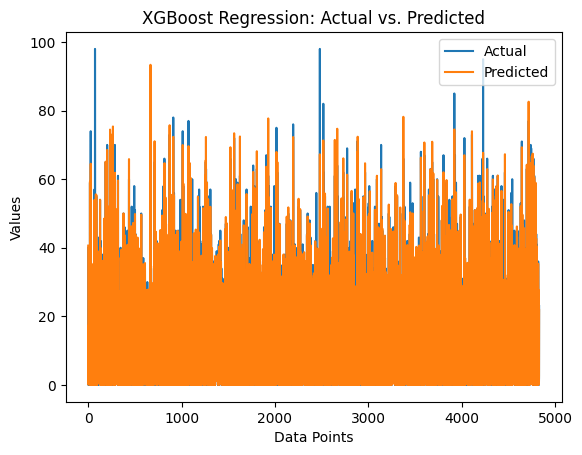

In [ ]:
# Line plot
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_test)), y_pred, label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('XGBoost Regression: Actual vs. Predicted')
plt.legend()
plt.show()

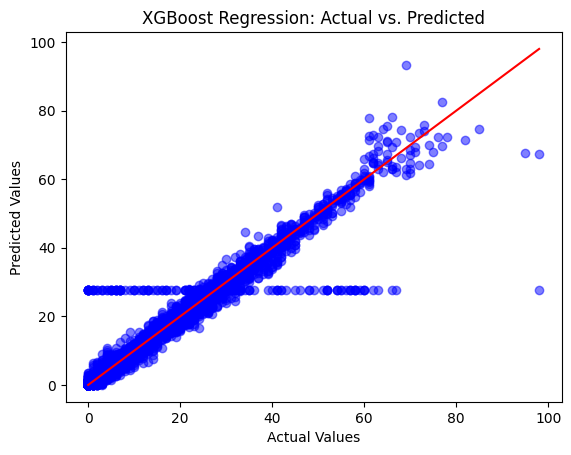

In [ ]:
import matplotlib.pyplot as plt

# Plotting the predicted values versus the actual values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Plotting the diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost Regression: Actual vs. Predicted")
plt.show()

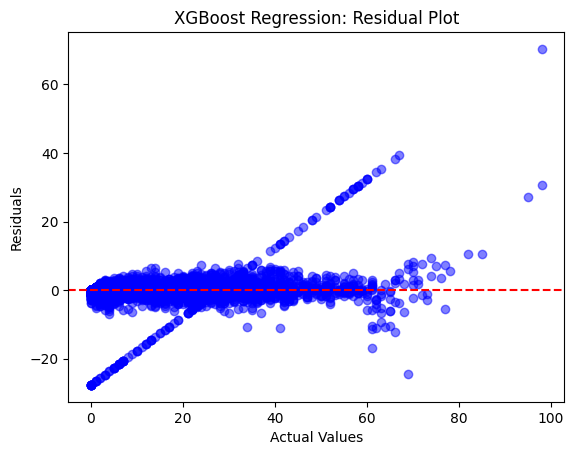

In [ ]:
residuals = y_test - y_pred

# Plotting the residuals
plt.scatter(y_test, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Plotting the horizontal line at y=0
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("XGBoost Regression: Residual Plot")
plt.show()

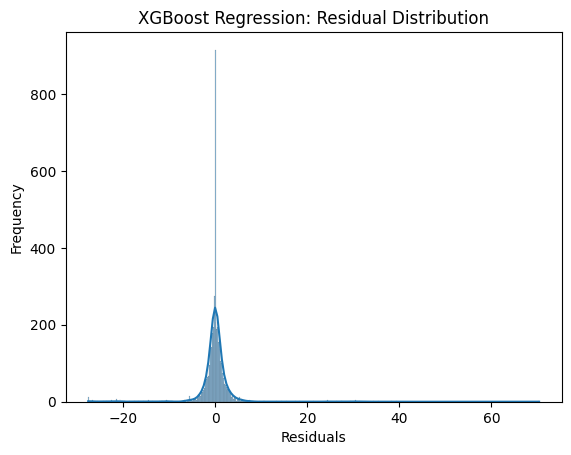

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('XGBoost Regression: Residual Distribution')
plt.show()

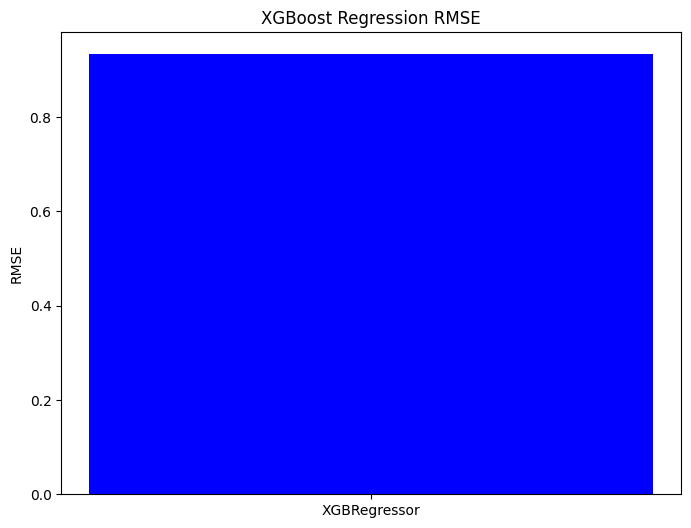

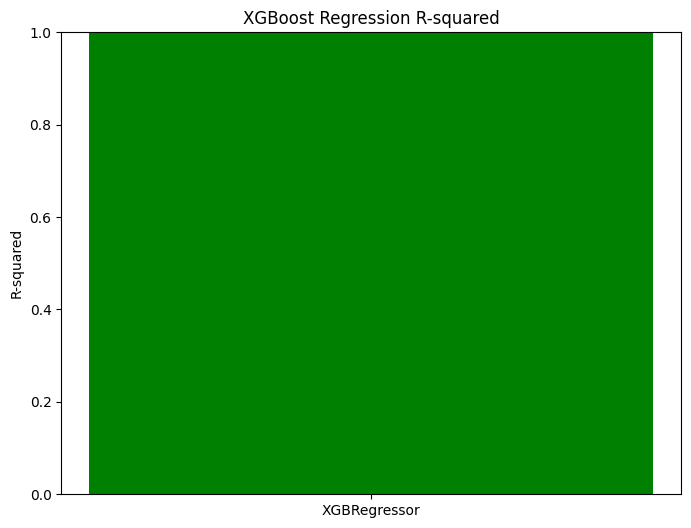

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Create a bar plot for RMSE
plt.figure(figsize=(8, 6))
plt.bar(["XGBRegressor"], [r2], color='blue')
plt.ylabel("RMSE")
plt.title("XGBoost Regression RMSE")
plt.ylim(bottom=0)
plt.show()

# Create a bar plot for R-squared
plt.figure(figsize=(8, 6))
plt.bar(["XGBRegressor"], [rmse], color='green')
plt.ylabel("R-squared")
plt.title("XGBoost Regression R-squared")
plt.ylim(bottom=0, top=1)
plt.show()